# Vodafone Telecommunication : Customer Churn Prediction

## importing libraries

In [ ]:
pip install pyodbc
pip install pickle

In [1]:
# For loading data and related works
import numpy as np
import pandas as pd

# For controlling warnings
import warnings

# For data visualizatioon
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For connecting to the database
import pyodbc

# For stating hypothesis
import scipy.stats as stats

# For feature encoding
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# For data balancing
from imblearn.over_sampling import SMOTE

# For data spliting
from sklearn.model_selection import train_test_split

# For machine learning model
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

# For evaluating model results
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score

# For hyperparameter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# For operating system
import os

import pickle

warnings.filterwarnings('ignore')

### First Dataset : Loading training data from database

In [2]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from dotenv import load_dotenv, dotenv_values

In [4]:
#%%writefile .gitignore

In [5]:
env_var = dotenv_values(".env")

In [6]:
load_dotenv()

True

In [7]:
username

NameError: name 'username' is not defined

In [ ]:
server = env_var.get("SERVER")
database = env_var.get("DATABASE")
username = env_var.get("USERNAME_")
password = env_var.get("PASSWORD")

In [ ]:
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [ ]:
connection = pyodbc.connect(connection_string)

In [ ]:
query = "Select * from dbo.LP2_Telco_churn_first_3000"
data_from_database = pd.read_sql(query, connection)

In [14]:
data_from_database.shape

(3000, 21)

In [15]:
data_from_database.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Second Dataset : Loading testing data

In [193]:
test = pd.read_excel("Telco-churn-second-2000 (1).xlsx")

In [194]:
test.shape

(2000, 20)

In [195]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Third Dataset : Loading Training data 

In [196]:
data_from_github = pd.read_csv("C:/Users/hp/Documents/Azubi_2/project_2/Customer_churn/LP2_Telco-churn-last-2000.csv")

In [197]:
data_from_github.shape

(2043, 21)

In [198]:
data_from_github.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


# Cleaning Testing data

In [199]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


#### Function to check columns

In [201]:
def column_checker(data):
    for col in test.columns:
        print(col , " => " ,  data[col].unique())
column_checker(test)

customerID  =>  ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
gender  =>  ['Male' 'Female']
SeniorCitizen  =>  [0 1]
Partner  =>  ['No' 'Yes']
Dependents  =>  ['No' 'Yes']
tenure  =>  [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
PhoneService  =>  ['Yes' 'No']
MultipleLines  =>  ['Yes' 'No' 'No phone service']
InternetService  =>  ['Fiber optic' 'No' 'DSL']
OnlineSecurity  =>  ['No' 'No internet service' 'Yes']
OnlineBackup  =>  ['No' 'No internet service' 'Yes']
DeviceProtection  =>  ['No' 'No internet service' 'Yes']
TechSupport  =>  ['No' 'No internet service' 'Yes']
StreamingTV  =>  ['Yes' 'No internet service' 'No']
StreamingMovies  =>  ['No' 'No internet service' 'Yes']
Contract  =>  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  =>  ['Yes' 'No']
PaymentM

In [202]:
test.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [203]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


#### function to replace column values

In [204]:
# Replace values in multiple columns
columns_to_replace = ['MultipleLines', 'PhoneService', 'DeviceProtection', 'InternetService', 
                      'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'TechSupport', 'StreamingMovies',
                      'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']

# Define the mapping of values to replace
value_mapping = {
    True: 'Yes',
    False: 'No',
    np.nan: 'No',
    '': 'No',
    'NaN': 'No',
    'Nan': 'No',
    'NaN': 'No',
    0: 'No',
    1: 'Yes',
}

In [205]:
value_mapping

{True: 'Yes', False: 'No', nan: 'No', '': 'No', 'NaN': 'No', 'Nan': 'No'}

In [206]:
test.MonthlyCharges.dtype == "float64"

True

In [207]:
# Loop through each column and replace the values
def column_replacer(data):
    for column in columns_to_replace:
        if data[column].dtype == "float64" or data[column].dtype == "int64":
            data[column] = data[column].astype(str) # changing to string
        data[column] = data[column].replace(value_mapping)
column_replacer(test)

In [208]:
column_checker(test)


customerID  =>  ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
gender  =>  ['Male' 'Female']
SeniorCitizen  =>  ['0' '1']
Partner  =>  ['No' 'Yes']
Dependents  =>  ['No' 'Yes']
tenure  =>  [12  9 27  1 24 14 32 11 38 54 29 44 59  3 18 67 22 33  5  2 72 16  8 23
 50 17 68 25 71 46 48 61 37 65 49 64 21 10  6 51 47 52 35 45  4 60 28 39
 30 55 58 26 43 56 36 13 70 69 41 15 19 31 34 66 40  7 53 63 42  0 57 62
 20]
PhoneService  =>  ['Yes' 'No']
MultipleLines  =>  ['Yes' 'No' 'No phone service']
InternetService  =>  ['Fiber optic' 'No' 'DSL']
OnlineSecurity  =>  ['No' 'No internet service' 'Yes']
OnlineBackup  =>  ['No' 'No internet service' 'Yes']
DeviceProtection  =>  ['No' 'No internet service' 'Yes']
TechSupport  =>  ['No' 'No internet service' 'Yes']
StreamingTV  =>  ['Yes' 'No internet service' 'No']
StreamingMovies  =>  ['No' 'No internet service' 'Yes']
Contract  =>  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  =>  ['Yes' 'No']
Paym

Our testing data has no null values

## Handling column "TotalCharges"

In [209]:
test.TotalCharges = test.TotalCharges.astype(str)


In [210]:
# replacing values

test.TotalCharges = test.TotalCharges.apply(lambda x : str(x).replace('',"0"))
test.TotalCharges = test.TotalCharges.apply(lambda x : str(x).replace("0.0","0"))
test.TotalCharges = test.TotalCharges.apply(lambda x : str(x).replace("0 0","0"))
test.TotalCharges = test.TotalCharges.apply(lambda x : str(x).replace("000 000","0"))
test.TotalCharges = test.TotalCharges.apply(lambda x : str(x).replace('0000000 0000000',"0"))


In [211]:
test.TotalCharges = test.TotalCharges.astype(float)

In [212]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   object 
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [213]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1.000509e+11
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,1.080108e+07
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2.020102e+11
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2.010800e+11
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,8.090105e+07


# Cleaning Training data

Before applying cleaning we need to concatenate the two datasets in to one data

In [214]:
training = pd.concat([data_from_database , data_from_github])

In [215]:
training.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [216]:
training.shape

(5043, 21)

In [217]:
training.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines        True
InternetService     False
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn                True
dtype: bool

In [218]:
column_checker(training)

customerID  =>  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  =>  ['Female' 'Male']
SeniorCitizen  =>  [False True]
Partner  =>  [True False 'No' 'Yes']
Dependents  =>  [False True 'No' 'Yes']
tenure  =>  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService  =>  [False True 'Yes' 'No']
MultipleLines  =>  [None False True 'No' 'No phone service' 'Yes']
InternetService  =>  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  =>  [False True None 'No' 'Yes' 'No internet service']
OnlineBackup  =>  [True False None 'No' 'Yes' 'No internet service']
DeviceProtection  =>  [False True None 'No' 'Yes' 'No internet service']
TechSupport  =>  [False True None 'Yes' 'No' 'No internet service']
StreamingTV  =>  [False True None 'No' 'Yes' 'No internet service']
StreamingMovies  =

In [219]:
column_replacer(training)

In [220]:
column_checker(training)

customerID  =>  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender  =>  ['Female' 'Male']
SeniorCitizen  =>  ['No' 'Yes']
Partner  =>  ['Yes' 'No']
Dependents  =>  ['No' 'Yes']
tenure  =>  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService  =>  ['No' 'Yes']
MultipleLines  =>  ['No' 'Yes' 'No phone service']
InternetService  =>  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  =>  ['No' 'Yes' 'No internet service']
OnlineBackup  =>  ['Yes' 'No' 'No internet service']
DeviceProtection  =>  ['No' 'Yes' 'No internet service']
TechSupport  =>  ['No' 'Yes' 'No internet service']
StreamingTV  =>  ['No' 'Yes' 'No internet service']
StreamingMovies  =>  ['No' 'Yes' 'No internet service']
Contract  =>  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  =>  ['Yes' 'No']
P

## Handling column "TotalCharges"

In [221]:
a = training["TotalCharges"].dropna() # dropping null values 

In [222]:
a = a.astype(str) # changing to string to replace non int values

In [223]:
# replacing values

a = a.apply(lambda x : x.replace('',"0"))
a = a.apply(lambda x : x.replace("0 0","0"))

In [224]:
a = a.astype(float)

In [225]:
my_mean = a.mean()

In [226]:
training["TotalCharges"] = training["TotalCharges"].fillna(my_mean) # filling null values by mean

In [227]:
training["TotalCharges"].isnull().sum()

0

In [228]:
training["TotalCharges"] = training["TotalCharges"].apply(lambda x : str(x).replace(" ","0"))

In [229]:
training["TotalCharges"] = training["TotalCharges"].astype(float)

## Handling column "Churn"

In [230]:
training["Churn"].unique()

array([False, True, None, 'No', 'Yes'], dtype=object)

In [231]:
training["Churn"] = training["Churn"].astype(str)

In [232]:
#  replacing values

training["Churn"] = training["Churn"].apply(lambda x: x.replace("False","No"))
training["Churn"] = training["Churn"].apply(lambda x: x.replace('True',"Yes"))
training["Churn"] = training["Churn"].apply(lambda x: x.replace("nan","No"))
training["Churn"] = training["Churn"].apply(lambda x: x.replace("None","No"))

In [233]:
training.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [234]:
training.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [235]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [236]:
training.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


Now our training data is cleaned

In [237]:
training.to_csv("training_data.csv")

# Stating hypothesis

Null Hypothesis : There is no significate effect of customers being senior citizen for a company to have more churn customers

Alternative Hypothesis : There is significate effect of customers being senior citizen for a company to have more churn customers

In [238]:
training.SeniorCitizen

0        No
1        No
2        No
3        No
4        No
       ... 
2038     No
2039     No
2040     No
2041    Yes
2042     No
Name: SeniorCitizen, Length: 5043, dtype: object

In [239]:
citizen = training.SeniorCitizen
churn = training.Churn

In [240]:
# preparing the data to hypothesis testing

citizen = citizen.apply(lambda x: str(x).replace("No", "0"))
citizen = citizen.apply(lambda x: str(x).replace("Yes", "1"))

churn = churn.apply(lambda x: str(x).replace("No", "0"))
churn = churn.apply(lambda x: str(x).replace("Yes", "1"))
#churn = churn.apply(lambda x: str(x).replace("One", "1"))


In [241]:
churn.unique()

array(['0', '1'], dtype=object)

In [242]:
# converting to numeric

citizen = citizen.astype(int)
churn = churn.astype(int)

### Shapiro hypothesis testing

Shapiro hypothesis testing used to check the whether a sample fits anormal distribution or not. In our scenario this type of testing help us to check if seniority of citizen distributed normally to customer churn value. So we are going to find p-value to check the distribution. When the p-values is less than 0.05, it is possible too reject the null hypothesis.

In [243]:
# checking p-value using shapiro

print(stats.shapiro(churn))

ShapiroResult(statistic=0.5507321357727051, pvalue=0.0)


In [244]:
print(stats.levene(churn, citizen))

LeveneResult(statistic=160.20801906037184, pvalue=1.927831898987456e-36)


In [245]:
t_stat, p_value = stats.ttest_ind(citizen, churn) #two sample t-test
print(t_stat, p_value)

-12.65733064513888 1.927831899002937e-36


In [246]:
alpha = 0.05
if p_value < alpha:
    print("Reject Null HYpothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null HYpothesis


According to our result we can conclude that there is an effect on being a senior citizen customer or not for the company to loose its users. We recommend the organization to look for senior citiznes to be its users.

In [247]:
seniorcitizen = training[training.SeniorCitizen == "Yes"]
leave_senior = seniorcitizen[seniorcitizen.Churn == "Yes"]["Churn"].count()

not_seniorcitizen = training[training.SeniorCitizen == "No"]
not_seniorcitizen = not_seniorcitizen[not_seniorcitizen.Churn == "Yes"]["Churn"].count()

list_citizen = ["Senior", "Not Senior"]
list_num = [leave_senior, not_seniorcitizen]


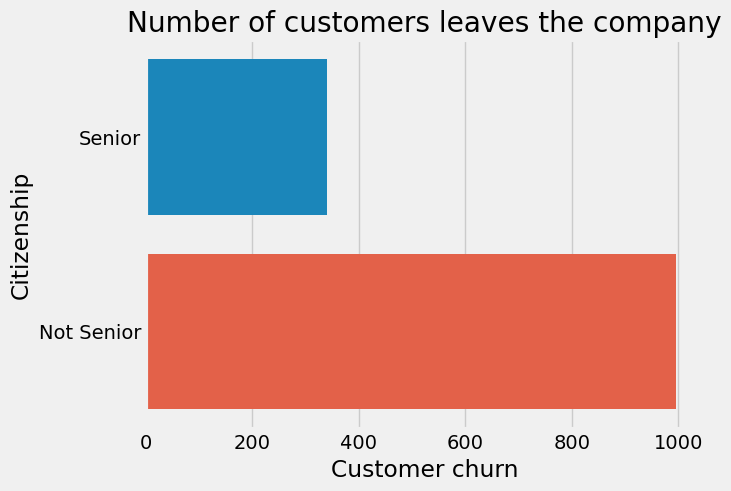

<Figure size 640x480 with 0 Axes>

In [248]:
sns.barplot(x = list_num, y= list_citizen )

# Show plot

plt.title("Number of customers leaves the company")
plt.xlabel("Customer churn")
plt.ylabel("Citizenship")

plt.style.use("fivethirtyeight")
plt.show()

plt.savefig("Customer_churn_vs_citizen.png")

This visualization can confidently explain the type of citizens who leaved at high amount. Customers who are not senior on citizenship exposed to leave the company. Senior citizens are likely to stay in the company by 250% than the other one.

# Asking questions and visualization

### 1. How gender is distributed ?

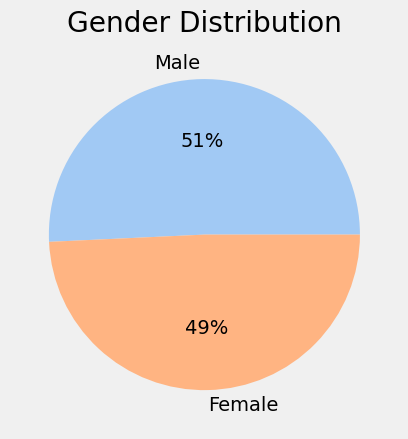

In [249]:
male = ( training["gender"] == "Male" ).sum()
female = ( training["gender"] == "Female" ).sum()

data = [male, female]
labels = ['Male', "Female"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Gender Distribution")
plt.show()

The gender distribution has no a big differnce, The data is a balanced with gender and we can not find any patterns.

### 2. How many customers are senior citizen ?

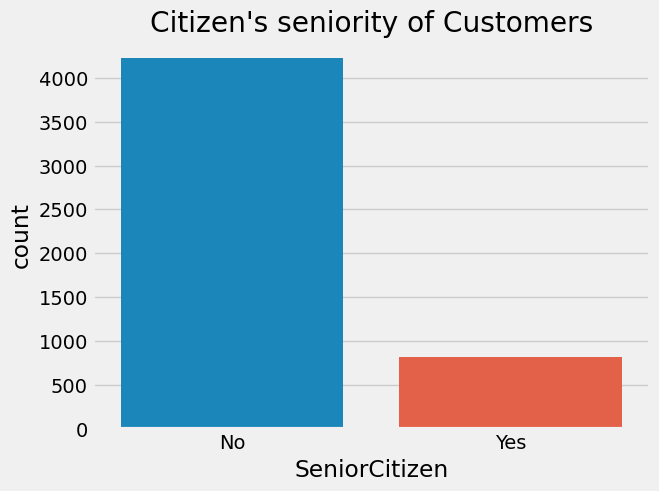

In [250]:
sns.countplot(x="SeniorCitizen", data=training)

plt.style.use("fivethirtyeight")
plt.title("Citizen's seniority of Customers")

plt.show()


More than 4000 customers are not senior Citizens and 800 are seniors. This shows a high variance.

### 3. How many customers are using different types of services from the company ?

In [251]:
MultipleLines = ( training["MultipleLines"] == "Yes" ).sum()
TechSupport = ( training["TechSupport"] == "Yes" ).sum()
OnlineSecurity = ( training["OnlineSecurity"] == "Yes" ).sum()
DeviceProtection = ( training["DeviceProtection"] == "Yes" ).sum()
OnlineBackup = ( training["OnlineBackup"] == "Yes" ).sum()
StreamingTV = ( training["StreamingTV"] == "Yes" ).sum()
Churn = ( training["Churn"] == "Yes" ).sum()

In [252]:
list_item = ["MultipleLines", "TechSupport", "OnlineSecurity", "DeviceProtection", "OnlineBackup", "StreamingTV", "Churn"]
list_num = [MultipleLines, TechSupport, OnlineSecurity, DeviceProtection, OnlineBackup, StreamingTV, Churn]

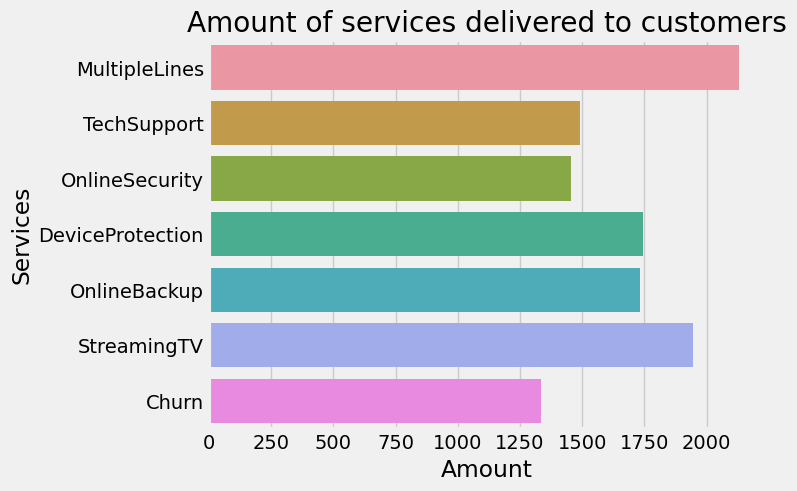

In [253]:
sns.barplot(x = list_num, y= list_item)


plt.xlabel("Amount")
plt.ylabel("Services")
plt.title("Amount of services delivered to customers")
# Show plot
plt.show()


More than 1250 number of customers are using various types of services. Particularly A service of multi line is the most popular by customers as its number is grater than 2000. After that streaming tv also the favoriable service delived from the company.

### 4. How many customers churn from the company ?

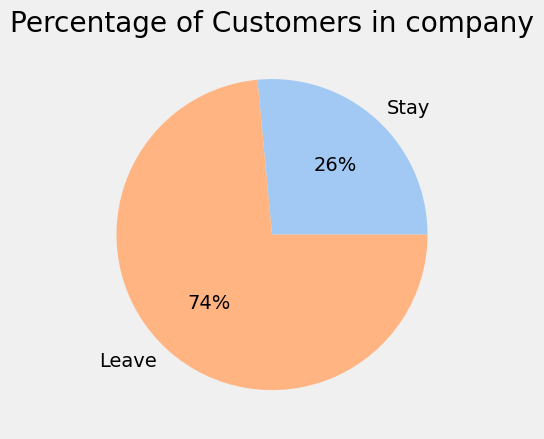

In [254]:
Stay = ( training["Churn"] == "Yes" ).sum()
Leave = ( training["Churn"] == "No" ).sum()

data = [Stay, Leave]
labels = ['Stay', "Leave"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Percentage of Customers in company")
plt.show()

The visualization is stating than three fourth of the whole customers are not willing to stay. More than half percent of them have not internet service, techsupport and other benefits from the organization. This is a blue print to speak the company is in danger zone.

### 5. What is Average Month charges ?


In [255]:
mean  = training["MonthlyCharges"].mean()
print("Averge monthly charge is : ", round(mean,2))

Averge monthly charge is :  65.09


### 6. What is total charge the company gained ?

In [256]:
total  = training["TotalCharges"].mean()
print("Averge Total charge is : ", round(total,2))

Averge Total charge is :  21254.45


### 7. What type of Internet service is used by customers ?

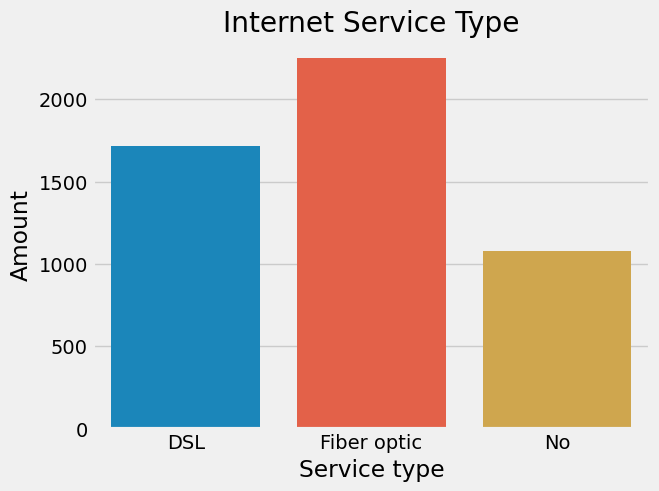

In [257]:
sns.countplot(x="InternetService", data=training)

plt.style.use("fivethirtyeight")

plt.title("Internet Service Type")
plt.xlabel("Service type")
plt.ylabel("Amount")
plt.show()


Fiber optic is the best service type as it provides a good speed on the service. It has a customers more than 2000. DSL also used by customers next to fiber optic. We would like to mention than about 1000 customers have no any coverge of inyernet service. It can also affect the customers churn amount.

# Checking for outliers

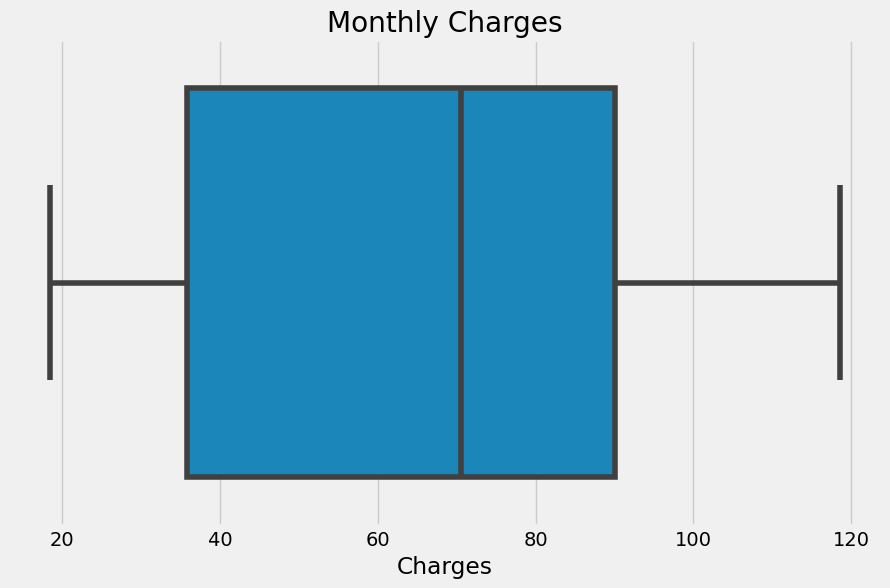

In [258]:
# Service usage - Monthly Charges
# Examining the Average monthly charges with a box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='MonthlyCharges', data=training)
plt.title('Monthly Charges')
plt.xlabel('Charges')
plt.show()

The box plot for monthly charges gives an overview of the distribution of charges among customers. It shows the range, median, quartiles, and any potential outliers in the monthly charges. With this, we can see that the average is around 70 with 20 being the lowest and 120 the highest charge per month. 

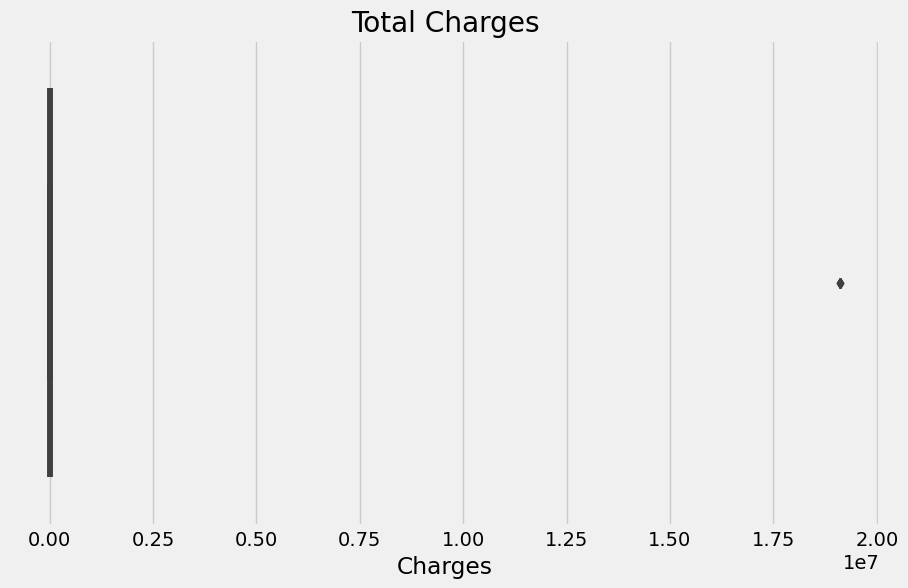

In [259]:
# Service usage - Monthly Charges
# Examining the Average monthly charges with a box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalCharges', data=training)
plt.title('Total Charges')
plt.xlabel('Charges')
plt.show()

There is too much outlier in the column TotalCharge. So for the sake of good machine learning model performance it needs to be corrected

In [260]:
training.drop(training.loc[training['TotalCharges'] > 10000].index, inplace=True)  # Handling outliers

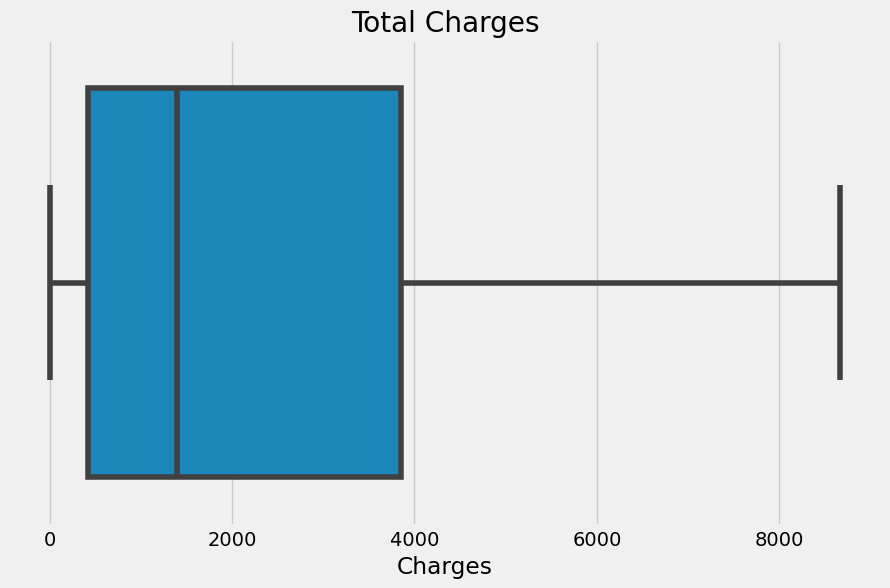

In [261]:
# Service usage - Monthly Charges
# Examining the Average monthly charges with a box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalCharges', data=training)
plt.title('Total Charges')
plt.xlabel('Charges')
plt.show()

we can see that the average is around 2000 with 500 being the lowest and 4000 the highest charge per month. 

# Bivariate and Multivariate analysis

## Bivariate Analysis

Bivariate analysis explores the relationship between two variables. In the case of customer churn data, bivariate analysis can help uncover potential correlations or dependencies between different variables and churn

In [262]:
# Churn by gender

# Analyzing the Churn Rate by Gender to observe any patterns associated with churn
PaymentMethod = training.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().reset_index()
PaymentMethod.rename(columns={'No': 'No Churn', 'Yes': 'Churn'}, inplace=True)

fig = px.bar(PaymentMethod, x='PaymentMethod', y=['No Churn', 'Churn'], barmode='stack', title='Churn by PaymentMethod')
fig.show()

The stacked bar chart demonstrates the churn rates categorized by gender. It shows that there is about 80% No Churn rate in both Male and Female and about 20% Churn rate in both too, so there's no pattern in genders.

In [263]:
# Churn and service usage - Monthly Charges
# Analyzing the Churn Rate by Monthly Charges to observe any patterns associated with churn
fig = px.scatter(training, x='MonthlyCharges', y='Churn', color='Churn', title='Churn and Monthly Charges')
fig.show()

The scatter plot visualizes the relationship between churn and monthly charges. It allows us to observe whether there is any noticeable pattern or trend between higher charges and churn. It can help identify if customers with higher monthly charges are more likely to churn. This shows that charges between 70 to 110 have a higher chance to churn and also not churn which means no noticeable patterns

In [264]:
# Churn and contract information - Contract
# Analyzing the Churn Rate by Contract to observe any patterns associated with churn
contract_churn = training.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().reset_index()
contract_churn.rename(columns={'No': 'No Churn', 'Yes': 'Churn'}, inplace=True)

fig = px.bar(contract_churn, x='Contract', y=['No Churn', 'Churn'], barmode='stack', title='Churn by Contract Type')
fig.show()


The stacked bar chart showcases the churn rates based on different contract types (Month-to-month, One year and Two years). It shows that a signicantly higher percentage of customers are likely to churn with a contract type of Month-to-month.

# Feature Engineering

<AxesSubplot:>

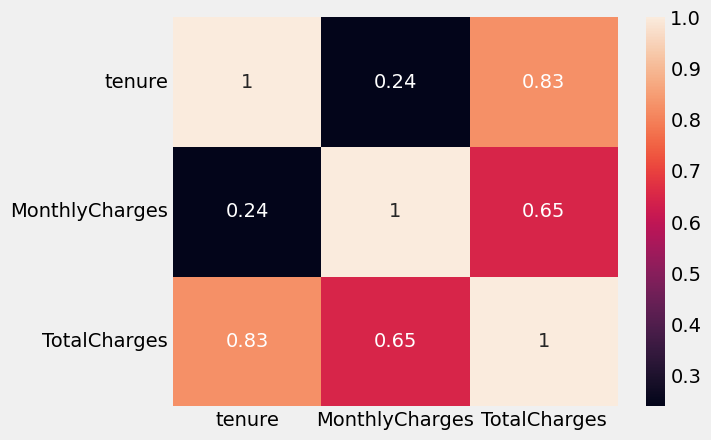

In [265]:
sns.heatmap( training.corr() , annot = True )

## Correlation perspectives

Customers having a time of high tenure gives a lot of total charge to the company

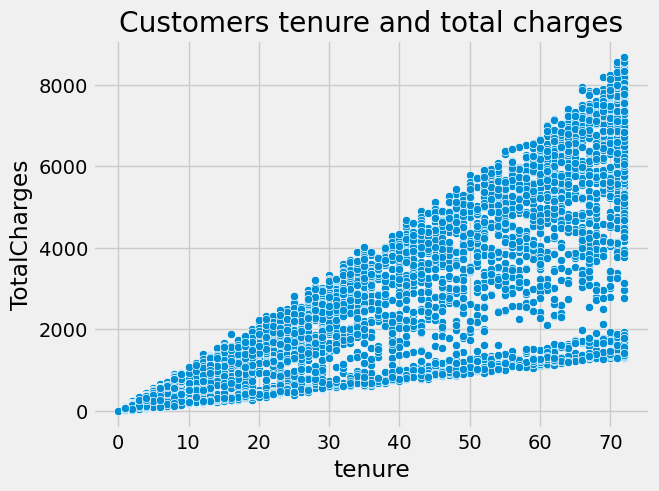

In [266]:
sns.scatterplot(x = "tenure" , y = "TotalCharges" , data=training)
plt.title("Customers tenure and total charges")
plt.show()

# Feature Scaling

In [267]:
target_name = "Churn"
target = training["Churn"]

data = training.drop(columns=["Churn"])

In [268]:
# selecting a column by its type

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [269]:
# assigning an encoder
categorical_preprocessor = OrdinalEncoder()
numerical_preprocessor = StandardScaler()

In [270]:
# collaborating the processing
preprocessor = ColumnTransformer(
    [
        ("ordinal-encoder", categorical_preprocessor, categorical_columns),
        ("standard_scaler", numerical_preprocessor, numerical_columns),
    ]
)

In [271]:
target_t = categorical_preprocessor.fit_transform(target.array.reshape(-1 , 1))

In [272]:
target_t.astype(int)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [273]:
target_t = pd.DataFrame(target_t , columns = ["Churn"] )

In [274]:
target_t

,Churn
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
5028,0.0
5029,0.0
5030,0.0
5031,1.0


In [275]:
target_t.value_counts()

Churn
0.0      3698
1.0      1335
dtype: int64

In [276]:
# a function to convert to string
def target_to_string(data):
    data = data.astype(str)
    data = data.apply(lambda x : x.replace("0.0" , "No"))
    data = data.apply(lambda x : x.replace("1.0" , "Yes"))
    
    return data

In [277]:
target_t = target_to_string(target_t)
target_t

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
5028,No
5029,No
5030,No
5031,Yes


In [278]:
data_t = preprocessor.fit_transform(data)

In [279]:
data_t = pd.DataFrame(data_t  ,columns = list(data.columns))

In [280]:
data_t.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3846.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.288946,-1.172975,-1.000534
1,2825.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.056757,-0.271349,-0.181033
2,1844.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-1.248168,-0.374487,-0.966030
3,3957.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.505324,-0.758760,-0.202515
4,4639.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.248168,0.186118,-0.946860


# Balancing the data

In [281]:
target_t.value_counts()

Churn
No       3698
Yes      1335
dtype: int64

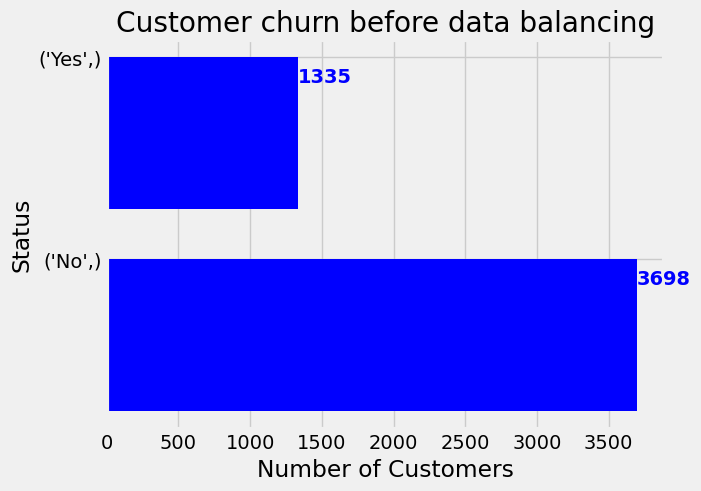

In [282]:
a = target_t.value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Customer churn before data balancing')
plt.ylabel('Status')
plt.xlabel('Number of Customers')
plt.show()

### The above graph states tha our data on target column is not balanced

In [283]:
nm = SMOTE()

In [284]:
data_balanced_t , target_balanced_t = nm.fit_resample(data_t , target_t)

In [285]:
target_balanced_t.value_counts()

Churn
No       3698
Yes      3698
dtype: int64

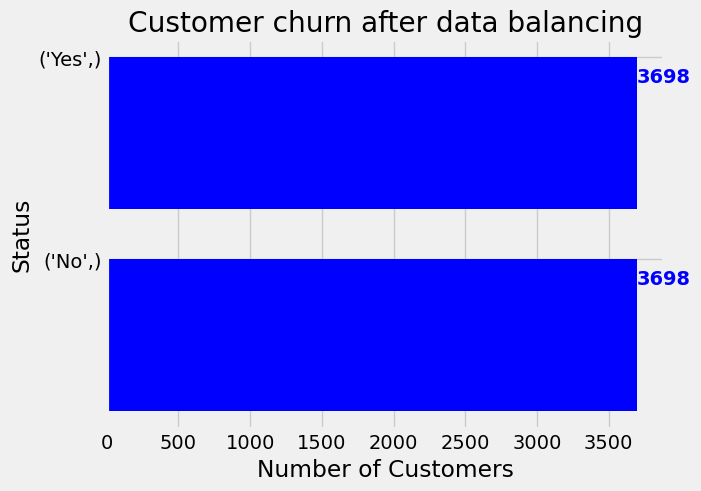

In [286]:
a = target_balanced_t.value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Customer churn after data balancing')
plt.ylabel('Status')
plt.xlabel('Number of Customers')
plt.show()

In [287]:
print("Independet Data is : ", data_balanced_t.shape , "Dependent Data is :" , target_balanced_t.shape)

Independet Data is :  (7396, 20) Dependent Data is : (7396, 1)


### ... data balanced

# Machine Modeling

In [288]:
# splitting data

data_train, data_test, target_train, target_test = train_test_split(
    data_balanced_t, target_balanced_t, random_state=42
)

## 1. Logistic Regression

In [289]:
model_trained = []

In [290]:
log = LogisticRegression() # assigning the module to a variable

In [291]:
log.fit(data_train , target_train ) # training the model by fitting a training data

LogisticRegression()

In [292]:
model_trained.append(log)

In [293]:
target_predicted = log.predict(data_test)  # trying to make a prediction

In [294]:
print("classification report for :" , log.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : LogisticRegression()
              precision    recall  f1-score   support

          No       0.81      0.70      0.75       934
         Yes       0.73      0.83      0.78       915

    accuracy                           0.76      1849
   macro avg       0.77      0.77      0.76      1849
weighted avg       0.77      0.76      0.76      1849



## Confusion matrix

In [295]:
def view_confusion(y_true , target):
    cm = confusion_matrix(y_true , target)
    cm_display = ConfusionMatrixDisplay(cm).plot()

In [296]:
target_predicted

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

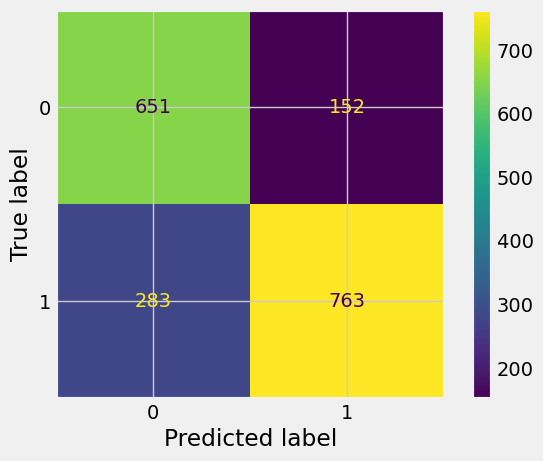

In [297]:
view_confusion(target_predicted, target_test)

### 2. HistGradientBoostingClassifier

In [298]:

hist = HistGradientBoostingClassifier()

In [299]:
hist.fit(data_train , target_train )

HistGradientBoostingClassifier()

In [300]:
model_trained.append(hist)

In [301]:
target_predicted = hist.predict(data_test)

In [302]:
print("classification report for :" , hist.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : HistGradientBoostingClassifier()
              precision    recall  f1-score   support

          No       0.85      0.86      0.86       934
         Yes       0.86      0.85      0.85       915

    accuracy                           0.85      1849
   macro avg       0.85      0.85      0.85      1849
weighted avg       0.85      0.85      0.85      1849



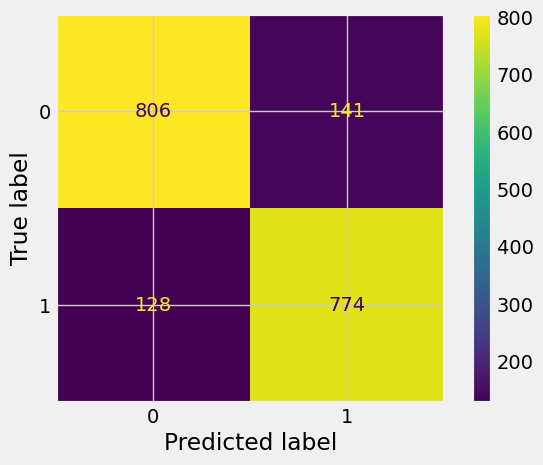

In [303]:
view_confusion(target_predicted, target_test)

## 3. K-Nearest Neihgbors

In [304]:
kn = KNeighborsClassifier(n_neighbors=5)

In [305]:
kn.fit(data_train , target_train )

KNeighborsClassifier()

In [306]:
model_trained.append(kn)

In [307]:
target_predicted = kn.predict(data_test)

In [308]:
print("classification report for :" , kn.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : KNeighborsClassifier()
              precision    recall  f1-score   support

          No       0.77      0.52      0.62       934
         Yes       0.63      0.84      0.72       915

    accuracy                           0.68      1849
   macro avg       0.70      0.68      0.67      1849
weighted avg       0.70      0.68      0.67      1849



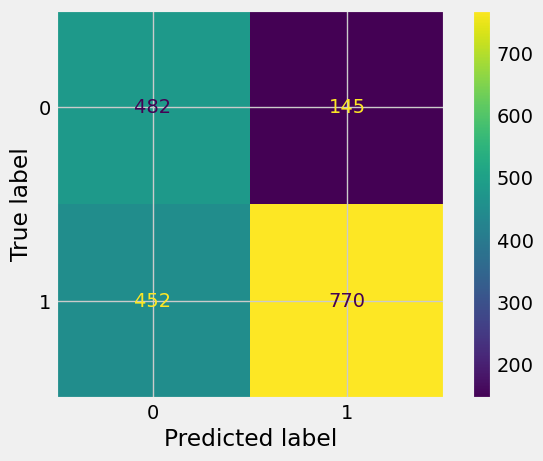

In [309]:
view_confusion(target_predicted, target_test)

# 4. Support vector machines( SVM )

In [313]:
sv = svm.SVC()

In [314]:
sv.fit(data_train , target_train)

SVC()

In [315]:
model_trained.append(sv)

In [316]:
target_predicted = sv.predict(data_test)

In [317]:
print("classification report for :" , sv.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : SVC()
              precision    recall  f1-score   support

          No       0.51      0.34      0.41       934
         Yes       0.50      0.66      0.57       915

    accuracy                           0.50      1849
   macro avg       0.50      0.50      0.49      1849
weighted avg       0.50      0.50      0.49      1849



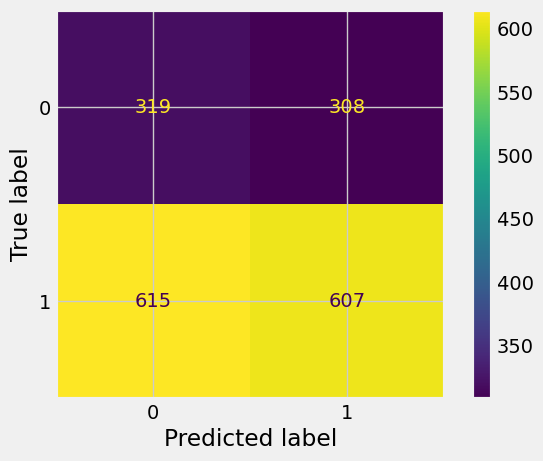

In [318]:
view_confusion(target_predicted, target_test)

# 5. Decision Classifier Model

In [319]:
ds = DecisionTreeClassifier()

In [320]:
ds.fit(data_train , target_train)

DecisionTreeClassifier()

In [321]:
model_trained.append(ds)

In [322]:
target_predicted = ds.predict(data_test)

In [323]:
print("classification report for :" , ds.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : DecisionTreeClassifier()
              precision    recall  f1-score   support

          No       0.84      0.80      0.82       934
         Yes       0.81      0.84      0.82       915

    accuracy                           0.82      1849
   macro avg       0.82      0.82      0.82      1849
weighted avg       0.82      0.82      0.82      1849



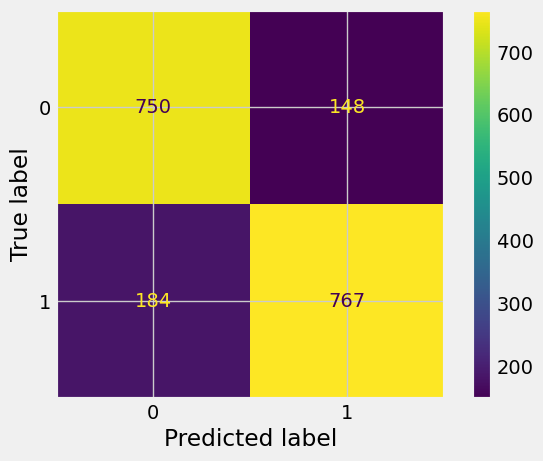

In [324]:
view_confusion(target_predicted, target_test)

# 5. Random Forest

In [325]:
rm = RandomForestClassifier()
rm.fit(data_train , target_train)

RandomForestClassifier()

In [326]:
model_trained.append(rm)

In [327]:
target_predicted = ds.predict(data_test)

In [328]:
print("classification report for :" , ds.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : DecisionTreeClassifier()
              precision    recall  f1-score   support

          No       0.84      0.80      0.82       934
         Yes       0.81      0.84      0.82       915

    accuracy                           0.82      1849
   macro avg       0.82      0.82      0.82      1849
weighted avg       0.82      0.82      0.82      1849



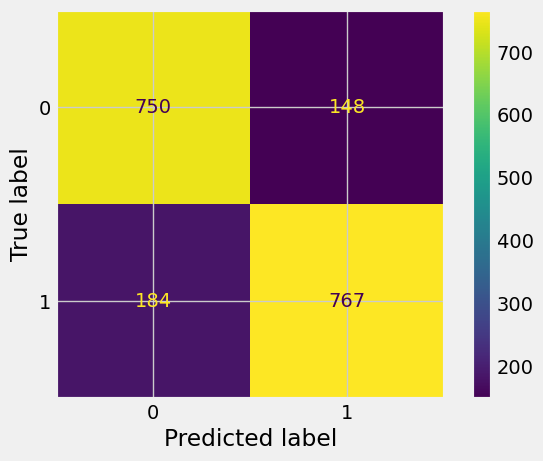

In [329]:
view_confusion(target_predicted, target_test)

# Model Comparision

In [330]:
metric = f1_score

In [331]:
info = [ { "Model_Name" : model.__str__(),
         f"metric ( {metric.__name__} ) ": metric(
             y_true = target_test,
             y_pred = model.predict(data_test),
             pos_label = "Yes"),  # pos label shows to which prediction value it is pointing
             } for model in model_trained ]

In [332]:
metric = pd.DataFrame(info)

In [333]:
metric

,Model_Name,metric ( f1_score )
0,LogisticRegression(),0.778174
1,HistGradientBoostingClassifier(),0.851954
2,KNeighborsClassifier(),0.720636
3,SVC(),0.568086
4,SVC(),0.568086
5,DecisionTreeClassifier(),0.822079
6,RandomForestClassifier(),0.853216


# Model Evaluation using hyperparameter tunning and cross validation

In [334]:
model_params = {
    
    "hist gradient classifier" : {
        "model" : HistGradientBoostingClassifier(),
        "params" : {
            "loss" : ["log_loss" , "auto" , "binary_crossentropy" , "categorical_crossentropy" ],
            "learning_rate" : [0.1 , 1 , 2 ,3],
            "max_depth" : [25 , 50 , 75 , None],
            "l2_regularization" : [0 , 1.25 , 1.5 , 2],
            "scoring" : ["f1_micro" , "loss"]
        }
    }
}

In [335]:
scores = []
a = 0
for model_name , mp in model_params.items():
    a = a + 50
    clf = GridSearchCV(mp["model"] , mp["params"] , cv = 5 , return_train_score=False)
    clf.fit(data_train , target_train)
    scores.append({
        "model" : model_name,
        "best_score" : clf.best_score_,
        "best_params" : clf.best_params_
    })
    print(a , " percent")

50  percent


In [336]:
scores

[{'model': 'hist gradient classifier',
  'best_score': 0.8628113957058952,
  'best_params': {'l2_regularization': 1.25,
   'learning_rate': 0.1,
   'loss': 'auto',
   'max_depth': 25,
   'scoring': 'f1_micro'}}]

In [337]:
df = pd.DataFrame(scores)
df

,model,best_score,best_params
0,hist gradient classifier,0.862811,"{'l2_regularization': 1.25, 'learning_rate': 0..."


## The above table shows that HistGradient_classifier has the most best score which is 85%.

In [338]:
hs = HistGradientBoostingClassifier()

In [339]:
hs.fit(data_train , target_train)

HistGradientBoostingClassifier()

In [340]:
target_predicted = rm.predict(data_test)

In [341]:
print(classification_report(y_true = target_test , y_pred = target_predicted))

              precision    recall  f1-score   support

          No       0.85      0.86      0.86       934
         Yes       0.86      0.85      0.85       915

    accuracy                           0.86      1849
   macro avg       0.86      0.86      0.86      1849
weighted avg       0.86      0.86      0.86      1849



In [342]:
target_predicted = pd.DataFrame(target_predicted)

In [343]:
target_predicted

,0
0,No
1,No
2,Yes
3,No
4,Yes
...,...
1844,Yes
1845,No
1846,No
1847,No


In [344]:
predicted_yes = target_predicted[target_predicted == "Yes"].count()[0]
predicted_no = target_predicted[target_predicted == "No"].count()[0]

test_yes = target_test[target_test["Churn"] == "Yes"].count()[0]
test_no = target_test[target_test["Churn"] == "No"].count()[0]

In [345]:
compare_yes_list = [ ["Predicted Yes" ,predicted_yes]  , ["Test Yes" , test_yes]    ] 
compare_yes_table = pd.DataFrame( compare_yes_list , columns = ["Status" , "Count"])

In [346]:
compare_yes_table

,Status,Count
0,Predicted Yes,904
1,Test Yes,915


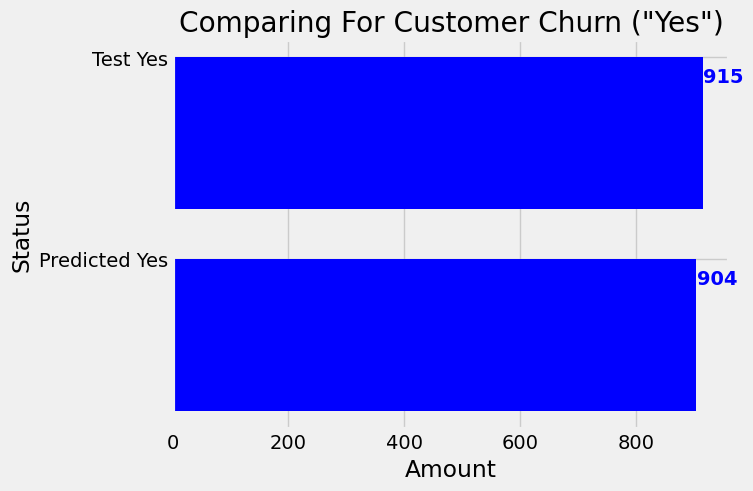

In [347]:
x = list(compare_yes_table["Status"])
y = list(compare_yes_table["Count"])

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Comparing For Customer Churn ("Yes")')
plt.ylabel('Status')
plt.xlabel('Amount')
plt.show()

In [348]:
compare_no_list = [ ["Predicted No" ,predicted_no]  , ["Test No" , test_no]    ] 
compare_no_table = pd.DataFrame( compare_no_list , columns = ["Status" , "Count"])

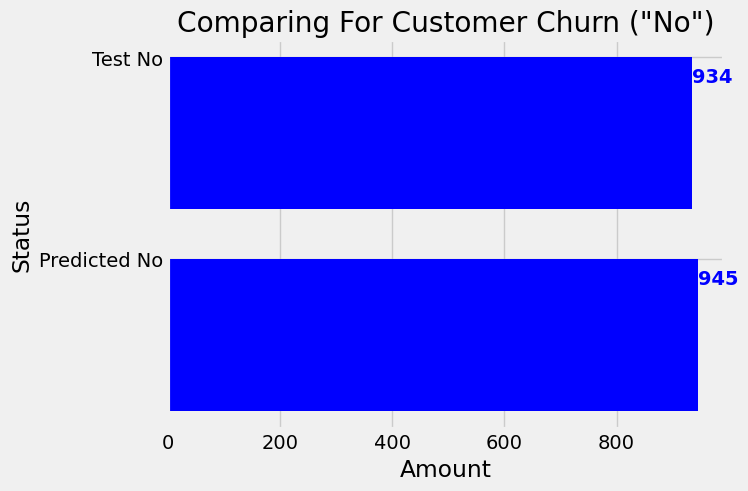

In [349]:
x = list(compare_no_table["Status"])
y = list(compare_no_table["Count"])

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Comparing For Customer Churn ("No")')
plt.ylabel('Status')
plt.xlabel('Amount')
plt.show()

# Prediction for our Test data

### First we are going to scale our test data before predicting

In [350]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1.000509e+11
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,1.080108e+07
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2.020102e+11
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2.010800e+11
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,8.090105e+07


In [351]:
prepared_data = preprocessor.fit_transform(test)

In [352]:
prepared_data

array([[ 1.53000000e+03,  1.00000000e+00,  0.00000000e+00, ...,
        -8.06163501e-01,  6.80953734e-01,  3.64298104e-02],
       [ 9.05000000e+02,  1.00000000e+00,  0.00000000e+00, ...,
        -9.27983402e-01, -1.44488228e+00, -5.25713360e-01],
       [ 1.91100000e+03,  1.00000000e+00,  0.00000000e+00, ...,
        -1.97063994e-01,  5.89680524e-01,  6.09357285e-01],
       ...,
       [ 9.59000000e+02,  1.00000000e+00,  1.00000000e+00, ...,
        -1.21222984e+00, -6.38359016e-01, -5.25768978e-01],
       [ 1.80600000e+03,  1.00000000e+00,  1.00000000e+00, ...,
         1.22416819e+00,  1.55385752e+00,  3.40793334e+00],
       [ 3.32000000e+02,  0.00000000e+00,  0.00000000e+00, ...,
        -6.43736966e-01, -1.46811546e+00, -5.08915928e-01]])

In [353]:
churn_predicted = rm.predict(prepared_data)

In [354]:
test["Churn"] = churn_predicted

In [355]:
# concatinating the churn result

test["Churn"] = test["Churn"].astype(str)
test["Churn"] = test["Churn"].apply(lambda x : x.replace("1.0" , "Yes"))
test["Churn"] = test["Churn"].apply(lambda x : x.replace("0.0" , "No"))

In [356]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1.000509e+11,Yes
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,1.080108e+07,No
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2.020102e+11,No
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2.010800e+11,No
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,8.090105e+07,Yes


# Prediction visualization

## 1 . Payment Method

In [357]:
payment_churn = test.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().reset_index()
payment_churn.rename(columns={'No': 'No Churn', 'Yes': 'Churn'}, inplace=True)

fig = px.bar(payment_churn, x='PaymentMethod', y=['No Churn', 'Churn'], barmode='stack', title='Predicted Precent of customer churn by Payment  Method')
fig.show()

# Suggestion

### Customer who pay using electronic check will not stay, untill they get a good online payment system

# 2 . Citizen Seniority

In [358]:
citizen_churn = test.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().reset_index()
citizen_churn.rename(columns={'No': 'No Churn', 'Yes': 'Churn'}, inplace=True)

fig = px.bar(citizen_churn, x='SeniorCitizen', y=['No Churn', 'Churn'], barmode='stack', title='Predicted Precent of customer churn by Citizen Seniority')
fig.show()

# 3. Internet Service

In [359]:
test_mapping = {
    "1" : "Yes",
    "0" : "No",
     1 : "Yes",
     0 : "No"
}
test["SeniorCitizen"] = test["SeniorCitizen"].replace(test_mapping)

In [363]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,No,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1.000509e+11,Yes
1,4568-TTZRT,Male,No,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,1.080108e+07,No
2,9513-DXHDA,Male,No,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2.020102e+11,No
3,2640-PMGFL,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2.010800e+11,No
4,3801-HMYNL,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,8.090105e+07,Yes


In [361]:
InternetService = test.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().reset_index()
InternetService.rename(columns={'No': 'No Churn', 'Yes': 'Churn'}, inplace=True)

fig = px.bar(InternetService, x='InternetService', y= ['No Churn' , 'Churn'] , barmode='stack', title='Predicted Precent of customer churn by Internet Service')
fig.show()

# Suggestion

### Customers who use Fiber optic type of internet service needs an a good service.

In [364]:
test_to_release = test[["customerID" , "Churn"]]

In [366]:
test_to_release.to_csv("Predicted_dataset.csv")

# Export key components

In [185]:
components = {
    "pipline" : preprocessor,
    "models" : model_trained
}

In [186]:
%mkdir export

A subdirectory or file export already exists.


In [187]:
destination = os.path.join("." , "export")

In [188]:
with open( os.path.join( destination , "ml.pkl" ) , "wb" ) as f :
    pickle.dump(components , f)

In [189]:
obj = pd.read_pickle(r'export/ml.pkl')

In [190]:
obj

{'pipline': ColumnTransformer(transformers=[('ordinal-encoder', OrdinalEncoder(),
                                  ['gender', 'SeniorCitizen', 'Partner',
                                   'Dependents', 'PhoneService', 'MultipleLines',
                                   'InternetService', 'OnlineSecurity',
                                   'OnlineBackup', 'DeviceProtection',
                                   'TechSupport', 'StreamingTV',
                                   'StreamingMovies', 'Contract',
                                   'PaperlessBilling', 'PaymentMethod']),
                                 ('standard_scaler', StandardScaler(),
                                  ['tenure', 'MonthlyCharges', 'TotalCharges'])]),
 'models': [LogisticRegression(),
  HistGradientBoostingClassifier(),
  KNeighborsClassifier(),
  SVC(),
  DecisionTreeClassifier(),
  RandomForestClassifier()]}

In [191]:
#pip freeze > export.requirements.txt

### To make my prediction clear I present only CustomerID and Predicted Churn columns